Matteo Picciolini

# Esercitazione 11

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

#center graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

2023-06-13 16:26:25.668562: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-13 16:26:25.710646: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-13 16:26:25.711499: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 16:26:26.354835: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Soluzione

Considero la retta
$$
f(x)=2x+1
$$
ed eseguo tentativi di fit su di essa tramite una rete neurale sequenziale.

Il codice per questo esercizio è stato già fornito e funziona implementando una rete con un solo neurone. 
È sufficiente una rete così semplice in quanto ogni neurone per definizione riceve un input $x$ e restituisce un output $y=mx+q$, dove $m$ e $q$ sono i parametri che il modello dovrà calibrare.

Come richiesto, si è testata la rete al variare dei seguenti parametri:
- $N_{\mathrm{epochs}}$, numero di epoche;
- $N_{\mathrm{train}}$, numero di dati di *train*;
- $\sigma$, rumore.

In [2]:
N_epochs = 30
N_train = 1000 # <<< train
N_valid = 50 # <<< test
sigma = 0.2

# target parameters of f(x) = m*x + q
m = 2 # slope
q = 1 # intersect

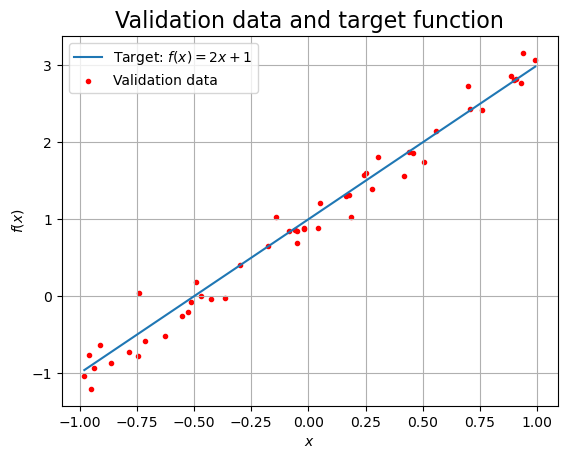

In [3]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()
y_target = m * x_valid + q # ideal (target) linear function

# actual measures from which we want to guess regression parameters
y_train = np.random.normal(m * x_train + q, sigma) 
y_valid = np.random.normal(m * x_valid + q, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label = 'Target: $f(x)= 2x +1$')
plt.scatter(x_valid, y_valid, color = 'r', marker = '.', label = 'Validation data')
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Validation data and target function", fontsize = 16)
plt.legend()
plt.grid(True)
plt.show()

Nello specchietto sopra ho calcolato i dati per il *training* e per la fase di *validation*, utilizzando la funzione *target* e aggiungendo un rumore gaussiano. Il grafico riportato mostra la funzione *target* e i dati di validazione. Di seguito costruisco la *Neural Network* e procedo con l'allenamento della rete.

In [4]:
# ==============================================
# INITIALIZE Neural Network (Sequential) model:
# a single neuron can make the fitting job, so
# i use only one layer on one neuron.
# ==============================================
model = tf.keras.Sequential()
model.add(Dense(1, input_shape = (1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse'])

# ==============================================
# TRAIN THE MODEL 
# I feed the neuron with the set of (x,y) training 
# pairs. The optimizer finds the best weights 
# minimizing the Mean Square Error loss function 
# ==============================================

history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = N_epochs,
                    shuffle = True, validation_data = (x_valid, y_valid))

2023-06-13 16:26:27.954520: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/30
32/32 [==============================] - 0s 6ms/step - loss: 1.6715 - mse: 1.6715 - val_loss: 1.1833 - val_mse: 1.1833
Epoch 2/30
32/32 [==============================] - 0s 4ms/step - loss: 0.8860 - mse: 0.8860 - val_loss: 0.7024 - val_mse: 0.7024
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5280 - mse: 0.5280 - val_loss: 0.4582 - val_mse: 0.4582
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 0.3419 - mse: 0.3419 - val_loss: 0.3106 - val_mse: 0.3106
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 0.2301 - mse: 0.2301 - val_loss: 0.2182 - val_mse: 0.2182
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 0.1608 - mse: 0.1608 - val_loss: 0.1579 - val_mse: 0.1579
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1173 - mse: 0.1173 - val_loss: 0.1184 - val_mse: 0.1184
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 0.0894 - mse: 0.08

Di seguito mostro il risultato della fase di *training*. Come si può vedere, in generale i valori che assumo i parametri sono compatibili con i valori effettivi. Questo è tanto più vero quanto più si aumenta il valore di $N_{train}$ e $N_{epochs}$. Ovviamente, a parità di $N_{train}$ e $N_{epochs}$ si ottengono valori della *loss function* più grandi all'aumentare di $\sigma$. Per un basso numero di dati di test si può notare che la predizione inizia a non essere accurata. Già sull'ordine del migliaio di dati sono sufficenti per garantire un'ottima stima con un numero di epoche esiguo. Si può notare, inoltre, che, procedendo di epoca in epoca, il valore della *loss* è sempre più costante. La *loss* è misurata attraverso la metrica scelta *MeanSquareError*.

In [5]:
print("Results")
w,b = model.get_weights()
print("Slope   m = " + str(w[0][0]))
print("Interc. q = " + str(b[0]))
print()
print()

# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(x_valid, y_valid, batch_size = 32, verbose = 0)
print('Test loss: ', score[0])
print()

#evaluate with the EXACT CURVE with m = 2 and q = 1
print("EXACT CURVE evaluation")
score = model.evaluate(x_valid, y_target, batch_size = 32, verbose = 0)
print('Test loss: ', score[0])

Results
Slope   m = 1.9888911
Interc. q = 1.0090469


TEST DATA evaluation
Test loss:  0.034046806395053864

EXACT CURVE evaluation
Test loss:  0.00013274179946165532


Mostro ora questi risultati in forma grafica.

4/4 [==============================] - 0s 4ms/step


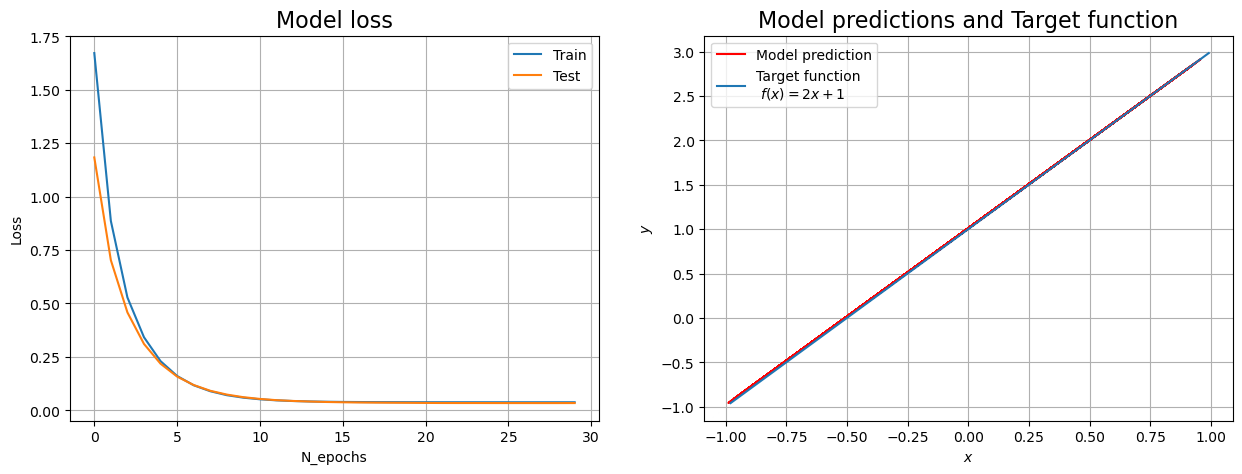

In [6]:
plt.figure(figsize = (15, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize = '16')
plt.ylabel('Loss')
plt.xlabel('N_epochs')
plt.legend(['Train', 'Test'])
plt.grid()

# ==============================================
# COMPARE MODEL predictions with TARGET FUNCTION
# ==============================================

# generate predictions
x_predicted = np.random.uniform(-1, 1, 100) 
y_predicted = model.predict(x_predicted)

# plot
plt.subplot(1, 2, 2)
plt.plot(x_predicted, y_predicted, color='r', label = "Model prediction")
plt.plot(x_valid, y_target, label = "Target function\n $f(x) = 2x+1$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Model predictions and Target function", fontsize = 16)
plt.grid()
plt.legend()
plt.show()

#### Osservazioni generali
Quanto più i dati forniti al modello per calibrarsi e testarsi sono rumorosi, tanto più saranno necessarie molte epoche affinché la calibrazione produca risultati accettabili, ossia una buona capacità del modello di prevedere dati sulla retta. In generale, le *loss functions* diminuiscono drasticamente entro una decina di epoche, oltre le quali la continua calibrazione non comporta miglioramenti significativi nella capacità predittiva del modello.

Come detto in precedenza, il modello è tanto più corretto quanti più sono i dati dedicati alla fase di *training*. Da questo esempio, modificando il valore di $N_{train}$ si può capire rapidamente come un modello di Machine Learning sia assolutamente inutile se il numero dei dati di *training* non è adeguato.  

In questo caso il modello si mostra più lento in fase di *training* all'aumentare delle epoche piuttosto che all'aumentare del numero dei dati di *training*, per questo motivo può essere più conveniente investire sul *training* piuttosto che su $N_{epochs}$.